In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to C:\Users\MY-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
data  = pd.read_csv("../data/raw/spam_or_not_spam.csv")
print(f"Dataset shape: {data.shape}")
print(data.head())

Dataset shape: (3032, 2)
                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...    0.0
1  martin a posted tassos papadopoulos the greek ...    0.0
2  man threatens explosion in moscow thursday aug...    0.0
3  klez the virus that won t die already the most...    0.0
4   in adding cream to spaghetti carbonara which ...    0.0


In [12]:
def clean_text(text) :
    if not isinstance(text, str):
        return ''
    
    text = text.lower()

    text = re.sub(r'http\S+', '' , text)
    text = re.sub(r'\S+@\S+', '' , text)
    text = re.sub(r'\d+', '', text)

    text = re.sub(r'[^\w\s]' , '' , text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text 

data['clean_email'] = data['email'].apply(clean_text)


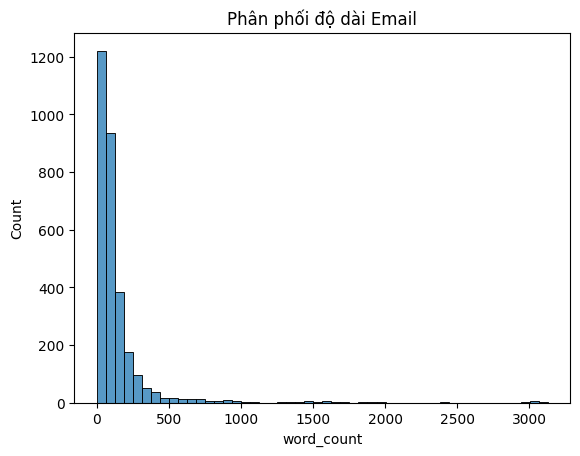

count    3032.000000
mean      138.538259
std       256.706285
min         0.000000
25%        41.750000
50%        80.000000
75%       138.000000
max      3130.000000
Name: word_count, dtype: float64


In [13]:
data['word_count'] = data['clean_email'].apply(lambda x : len(x.split()))
sns.histplot(data['word_count'], bins=50)
plt.title('Phân phối độ dài Email')
plt.show()

print(data['word_count'].describe())


In [14]:
VOCAB_SIZE = 10000  
MAX_LEN = 150     
OOV_TOKEN = "<OOV>"

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
tokenizer.fit_on_texts(data['clean_email'])

sequences = tokenizer.texts_to_sequences(data['clean_email'])

padded_sequences = pad_sequences(sequences , maxlen= MAX_LEN , padding = 'post' , truncating = 'post')

print(f"Ví dụ data gốc: {data['clean_email'][0]}")
print(f"Ví dụ sau khi số hóa: {padded_sequences[0]}")

Ví dụ data gốc: date wed number aug number number number number number chris garrigues cwg dated number numberfanumberd deepeddy com message id number number tmda deepeddy vircio com reproduce error repeatable like every time without fail debug log pick happening number number number pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number exec pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number number number ftoc_pickmsgs number hit number number number marking number hits number number number tkerror syntax error expression int note run pick command hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace number number sequence mercury number hit number hit comes obviously version nmh using delta pick version pick nmh number number number compiled url sun mar number number number number ict number relevant part mh_profile delta mhparam pick seq sel list since pick comma

In [15]:
labels = data['label'].values
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")


Shape X_train: (2425, 150)
Shape y_train: (2425,)


In [16]:
import os


os.makedirs('../data/processed', exist_ok=True)
os.makedirs('../saved_models', exist_ok=True) 


np.save('../data/processed/X_train.npy', X_train)
np.save('../data/processed/X_test.npy', X_test)
np.save('../data/processed/y_train.npy', y_train)
np.save('../data/processed/y_test.npy', y_test)


with open('../saved_models/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

